In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest
from numpy import percentile

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler



from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.cluster import DBSCAN, OPTICS

In [2]:
df_Moufia = pd.read_csv("Moufia_2014_2015/moufia_2014_2015.csv")
df_Possession = pd.read_csv("Possession_2014_2015/possession_2014_2015.csv")
df_SaintAndre = pd.read_csv("SaintAndre_2014_205/saintandre_2014_2015.csv")
df_SaintLeu = pd.read_csv("SaintLeu_2014_2015/saintleu_2014_2015.csv")
df_SaintPierre = pd.read_csv("SaintPierre_2014_2015/saintpierre_2014_2015.csv")

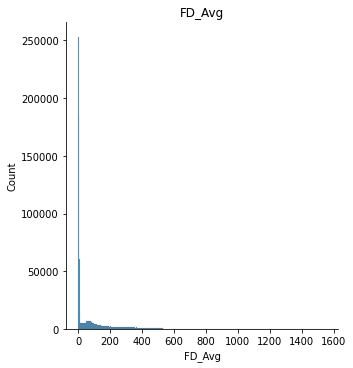

In [3]:
sns.displot(df_Moufia['FD_Avg'])
plt.title("FD_Avg")
sns.despine()

In [16]:
print("Skewness: %f" % df_Moufia['FD_Avg'].skew())
print("Kurtosis: %f" % df_Moufia['FD_Avg'].kurt())
#The distribution has positive long thin tail, the mass of the distribution is concentrated on the left of the figure. And the tail FD_Avg distribution far exceeds the tails of the normal distribution.

Skewness: 3.630061
Kurtosis: 17.868220


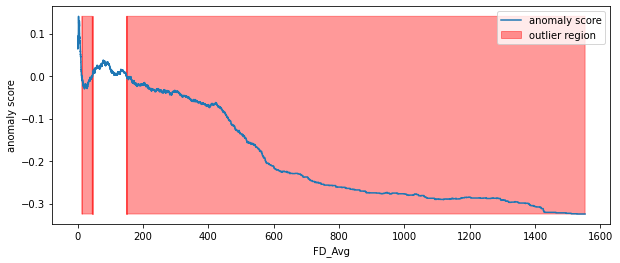

In [17]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_Moufia['FD_Avg'].values.reshape(-1, 1))
xx = np.linspace(df_Moufia['FD_Avg'].min(), df_Moufia['FD_Avg'].max(), len(df_Moufia)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('FD_Avg')
plt.show();

In [18]:
df_Moufia.loc[(df_Moufia['FD_Avg'] >= 200)]

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
566,2014-01-01 09:26:00,208.9,211.7,973.5000,76.66666,23.53333,140.98970,5.200000
567,2014-01-01 09:27:00,216.4,213.0,973.5000,76.90000,23.68333,145.80940,4.166667
568,2014-01-01 09:28:00,215.5,215.7,973.4666,75.30000,23.83333,149.11640,5.700000
569,2014-01-01 09:29:00,216.8,214.8,973.4500,75.23333,23.96667,141.34310,4.066667
570,2014-01-01 09:30:00,210.7,213.4,973.4000,74.53333,24.05000,135.95830,4.850000
...,...,...,...,...,...,...,...,...
1022841,2015-12-30 11:41:00,219.0,219.1,974.8499,71.65000,25.30000,91.00024,6.900000
1022842,2015-12-30 11:42:00,214.5,211.9,974.8833,72.05000,25.30000,104.66100,4.216667
1022843,2015-12-30 11:43:00,206.2,206.9,974.9000,71.93333,25.30000,103.81610,4.233334
1022856,2015-12-30 11:56:00,206.5,203.4,974.9000,73.40000,25.20000,101.86690,5.383333


In [3]:
x = normalize([df_Moufia['FD_Avg']])
x= x.reshape(-1,1)
df_Moufia['FD_Avg_Normalized'] = x

In [ ]:
clustering1 = OPTICS(eps=0.09, min_samples=6,n_jobs=-1).fit(np.array(df_Moufia['FD_Avg_Normalized']).reshape(-1,1))
labels = clustering1.labels_

In [ ]:
outlier_pos = np.where(labels == -1)[0]

x = []; y = [];
for pos in outlier_pos:
    x.append(np.array(df_Moufia['FD_Avg_Normalized'])[pos])
    y.append(df_Moufia['FD_Avg_Normalized'].index[pos])
    
import pickle

with open('x_dbscan', 'wb') as fp:
    pickle.dump(x, fp)

with open('y_dbscan', 'wb') as fp:
    pickle.dump(y, fp)

"""
with open ('outfile', 'rb') as fp:
    itemlist = pickle.load(fp)
"""
plt.plot(ts_dataframe['FD_Avg_Normalized'].loc[ts_dataframe['FD_Avg_Normalized'].index], 'k-')
plt.plot(y,x,'r*', markersize=8)  
plt.legend(['Actual', 'Anomaly Detected'])
plt.xlabel('Time Period')
plt.ylabel('Normalized Profit')